# Problema

Exercício de Têmpera SimuladaProblema do Caixeiro Viajante (Traveling Salesman Problem - TSP)

O problema do caixeiro viajante é um clássico problema de otimização combinatória. Imagine que um caixeiro viajante precisa visitar n cidades e retornar à cidade de origem, percorrendo a menor distância possível. O objetivo é encontrar a ordem de visitação das cidades que minimize o comprimento total do trajeto.Descrição do Problema:

Entrada: Um conjunto de n cidades, representadas por coordenadas no plano cartesiano (por exemplo, (x1, y1), (x2, y2), …, (xn, yn)).

Objetivo: Encontrar a permutação das cidades que minimize a soma das distâncias entre elas, considerando que o caixeiro viajante deve retornar à cidade de origem.

##Formulação Matemática:

Dada uma matriz de distâncias (D), onde (D[i][j]) representa a distância entre as cidades (i) e (j), o objetivo é encontrar uma permutação (\pi) das cidades que minimize a função objetivo:

[ f(\pi) = \sum_{i=1}^{n-1} D[\pi(i)][\pi(i+1)] + D[\pi(n)][\pi(1)] ]

onde (\pi(i)) representa a cidade visitada na posição (i) da permutação.


#Bibliotecas

In [ ]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

pd.set_option('display.expand_frame_repr', False)

#Funções

In [ ]:
#função para gerar as cidades
def gera_cidades(n_cidades):
  posicoes_cidades = []
  for _ in range(n_cidades):
    while True:
      x = random.randint(0, 100)
      y = random.randint(0, 100)
      if (x, y) not in posicoes_cidades:
        posicoes_cidades.append((x, y))
        break
  return posicoes_cidades

#monta a matriz de distâncias entre as cidades
def gera_matriz_distancias(posicoes_cidades):
  n_cidades = len(posicoes_cidades)
  matriz_distancias = [[0] * n_cidades for _ in range(n_cidades)]
  for i in range(n_cidades):
    for j in range(n_cidades):
      if i != j:
        distancia = math.sqrt((posicoes_cidades[i][0] - posicoes_cidades[j][0])**2 + (posicoes_cidades[i][1] - posicoes_cidades[j][1])**2)
        matriz_distancias[i][j] = distancia
  return matriz_distancias

#função pra gerar o caminho inicial aleatoriamente
def gera_caminho_inicial(n_cidades):
  caminho = list(range(n_cidades))
  random.shuffle(caminho)
  return caminho

#função objetivo. Calcula a distância do caminho
def funcao_objetivo(caminho, matriz_distancia):
  distancia_caminho = 0
  for i in range(len(caminho)-1):
    distancia_caminho = distancia_caminho + matriz_distancia[caminho[i]][caminho[i+1]]

  distancia_ultimo_trecho = matriz_distancia[caminho[-1]][caminho[0]]
  distancia_caminho = distancia_caminho + distancia_ultimo_trecho
  return distancia_caminho

#função pra gerar um novo caminho com pequena variação do caminho anterior, ou seja, na vizinhança, trocando aleatoriamente a posição de duas cidades.
#Vou adicionar um número n_swaps que dita quantas vezes essa troca acontece, pra testar varições maiores. Inicialmente será 1 para apenas uma troca.
def gera_caminho_vizinhanca(caminho, n_swaps):
  novo_caminho = caminho.copy()
  for _ in range(n_swaps):
    cidade_i, cidade_j = random.sample(range(len(novo_caminho)), 2)
    novo_caminho[cidade_i], novo_caminho[cidade_j] = novo_caminho[cidade_j], novo_caminho[cidade_i]
  return novo_caminho

#algoritmo da têmpera simulada
#fator de resfriamento (alpha) entre 0,88 e 0,99
def tempera_simulada(matriz_distancias, caminho_inicial, temperatura_inicial, fator_resfriamento, numero_iteracoes, n_swaps):
  #inicializando os parâmetros
  caminho_atual = caminho_inicial
  temperatura = temperatura_inicial

  #lista pra armazenar os valores da função objetivo em cada iteração
  valores_func_objetivo = []

  #percorre todas as iterações
  for _ in range(numero_iteracoes):
    novo_caminho = gera_caminho_vizinhanca(caminho_atual, n_swaps)
    delta_E = funcao_objetivo(novo_caminho, matriz_distancias) - funcao_objetivo(caminho_atual, matriz_distancias)

    #atualiza o caminho dado o delta E ou a função de probabilidade
    if delta_E < 0 or random.random() < math.exp(-delta_E/temperatura):
      caminho_atual = novo_caminho

    #reduz a temperatura segundo o fator de resfriamento alpha
    temperatura*=fator_resfriamento
    #atualiza a lista de valores de distância
    valores_func_objetivo.append(funcao_objetivo(caminho_atual, matriz_distancias))
  return caminho_atual, valores_func_objetivo

#plota o resultado e o gráfico de convergência
def plota_resultado(matriz_distancias, caminho_final, valores_func_objetivo):
  #plota a matriz distância
  print('Matriz de distâncias:')
  matriz_np = np.array(matriz_distancias)
  matriz_np = np.round(matriz_np, 2)
  n = len(matriz_np)
  nomes_colunas = [f"Cidade {j+1}" for j in range(n)]
  nomes_linhas = [f"Cidade {i+1}" for i in range(n)]
  df = pd.DataFrame(matriz_np, columns=nomes_colunas, index=nomes_linhas)
  print(df)
  #plota o caminho e a distância mínima
  print('\n'+'-'*100)
  print("Caminho que minimiza a distância percorrida pelo Caixeiro Viajante:")
  resultado = ''
  for cidade in caminho_final:
    resultado = resultado + 'Cidade ' + str(cidade+1) + ' -> '
  resultado = resultado + 'Cidade ' + str(caminho_final[0]+1)
  print(resultado)
  print(f"\nValor mínimo da distância percorrida pelo Caixeiro Viajante: {funcao_objetivo(caminho_final, matriz_distancias):.2f}")
  print('-'*100+'\n')

  #plota o gráfico
  plt.plot(valores_func_objetivo)
  plt.xlabel('Iterações')
  plt.ylabel('Valor da função objetivo')
  plt.title('Convergência do Algoritmo de Têmpera Simulada')
  plt.show()

#Implementação

In [ ]:
#Dados iniciais (alpha entre 0,88 e 0,99)
temperatura_inicial = 1000.0
fator_resfriamento = 0.99
numero_iteracoes = 2000
n_cidades = 10
n_swaps = 1

#gera as posições das cidades
posicoes_cidades = gera_cidades(n_cidades)

Matriz de distâncias:
           Cidade 1  Cidade 2  Cidade 3  Cidade 4  Cidade 5  Cidade 6  Cidade 7  Cidade 8  Cidade 9  Cidade 10
Cidade 1       0.00     59.51     46.07     66.19     70.26     38.21     69.46     42.19     76.66      69.87
Cidade 2      59.51      0.00     76.69     41.62     75.00     82.01     76.03     33.84     81.84      61.52
Cidade 3      46.07     76.69      0.00     54.08     32.65     16.55     30.87     43.29     36.69      42.52
Cidade 4      66.19     41.62     54.08      0.00     37.64     66.73     39.29     24.35     43.46      21.47
Cidade 5      70.26     75.00     32.65     37.64      0.00     49.19      2.24     44.05      7.21      17.03
Cidade 6      38.21     82.01     16.55     66.73     49.19      0.00     47.42     50.99     53.14      58.05
Cidade 7      69.46     76.03     30.87     39.29      2.24     47.42      0.00     44.60      7.28      19.00
Cidade 8      42.19     33.84     43.29     24.35     44.05     50.99     44.60      0.00 

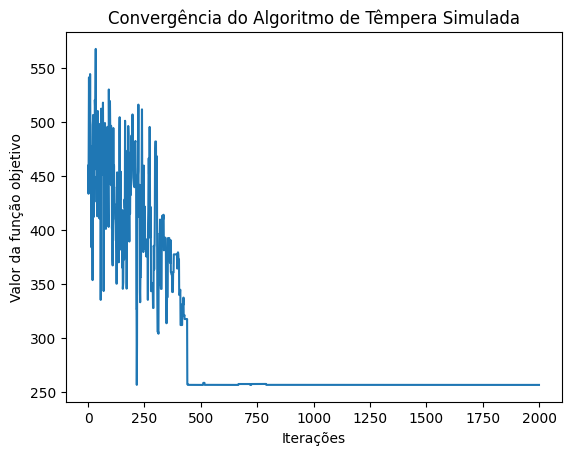

In [ ]:
#gera a matriz de distâncias
matriz_distancias = gera_matriz_distancias(posicoes_cidades)
#começa gerando o caminho inicial aleatório
caminho_inicial = gera_caminho_inicial(n_cidades)
#aplica a têmpera simulada
caminho_final, valores_func_objetivo = tempera_simulada(matriz_distancias, caminho_inicial, temperatura_inicial, fator_resfriamento, numero_iteracoes, n_swaps)
#plota o resultado
plota_resultado(matriz_distancias, caminho_final, valores_func_objetivo)
#valores_func_objetivo
